In [1]:
# imports
%cd ..
import os
from tqdm.notebook import tqdm
from mango.environments import frozen_lake
from mango import Agent, Mango
from frozen_lake_tests import utils_plot, utils_save, utils_sim

/home/alessio_arcudi/Documents/MANGO-lite


Experiment Parameters

In [2]:
# parameters for the environment
map_base = 2
map_scale = 3
p_frozen = [0.6]
one_shot = True

plot_vanilla_agent = True
plot_nomask_mango_agent = False

In [3]:
p=p_frozen[0]

In [4]:
dir_path = utils_save.path_to_save_dir(map_base, map_scale, p, one_shot)
dir_path

'frozen_lake_tests/results/4x4/allmaps_60%frozen/'

> /home/alessio_arcudi/Documents/MANGO-lite/frozen_lake_tests/utils_plot.py(68)plot_mango_agent_loss_reward()
     67     import ipdb; ipdb.set_trace()
---> 68     if save_path is not None:
     69         plt.savefig(save_path, bbox_inches="tight")



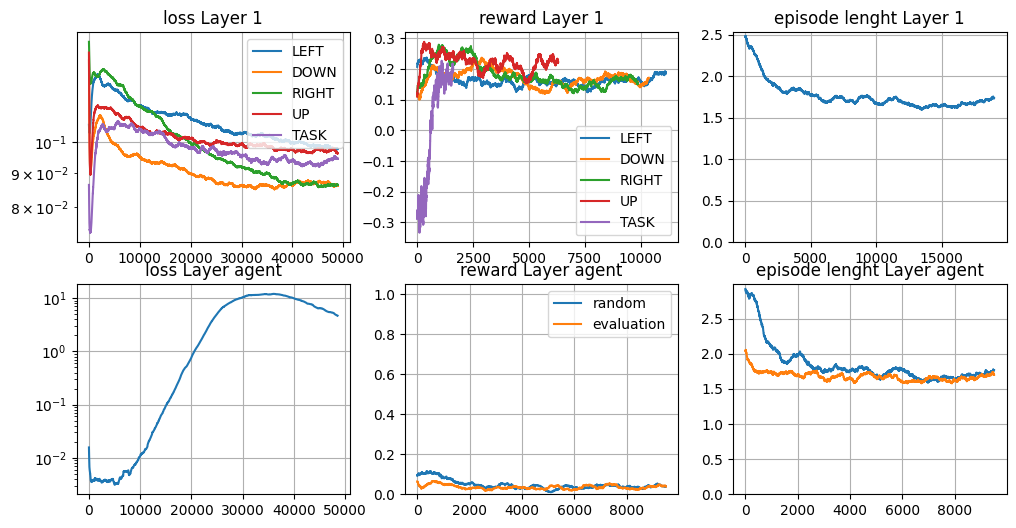

: 

In [26]:
if isinstance(p_frozen, float):
    p_frozen = [p_frozen]
for p in p_frozen:
    dir_path = utils_save.path_to_save_dir(map_base, map_scale, p, one_shot)
    files = sorted(os.listdir(dir_path + "models/"))[:1]
    mango_agent_files = [name for name in files if name.startswith("mango_agent")]
    run_ids = [f"run_{name[-9:-7]}" for name in mango_agent_files]
    mango_agents = [
        utils_save.load_from_file(dir_path + "models/" + file_name)
        for file_name in mango_agent_files
    ]
    agents_list, labels, colors = [mango_agents], ["mango"], ["tab:orange"]
    if plot_vanilla_agent:
        normal_agent_files = [name for name in files if name.startswith("normal_agent")]
        normal_agents = [
            utils_save.load_from_file(dir_path + "models/" + file_name)
            for file_name in normal_agent_files
        ]
        agents_list.append(normal_agents)
        labels.append("vanilla")
        colors.append("tab:blue")
    if plot_nomask_mango_agent:
        mango_nomask_agent_files = [name for name in files if name.startswith("nomask_mango_agent")]
        mango_nomask_agents = [
            utils_save.load_from_file(dir_path + "models/" + file_name)
            for file_name in mango_nomask_agent_files
        ]
        agents_list.append(mango_nomask_agents)
        labels.append("mango_nomask")
        colors.append("tab:green")

    os.makedirs(dir_path + "training/", exist_ok=True)
    for agents, run_id_str in zip(zip(agents_list), run_ids):
        for agent, label, color in zip(agents, labels, colors):
            if isinstance(agent[0], Mango):
                utils_plot.plot_mango_agent_loss_reward(
                    agent[0], save_path=f"{dir_path}training/train_results_{run_id_str}_{label}.pdf"
                )
            else:
                utils_plot.plot_normal_agent_loss_reward(
                    agent, save_path=f"{dir_path}training/train_results_{run_id_str}_{label}.pdf"
                )

In [23]:
for x,y in zip(zip(*agents_list), run_ids):
    print(x,y)

In [19]:
[x for x in zip(agents_list)]

[([Mango(
     (policy): <mango.policies.dqnet.DQNetPolicy object at 0x7f3b7b927c10>
     (1): MangoEnv(
       (environment): <TensorObservation<ReInitOnReset<CustomFrozenLakeEnv instance>>>
     )
     (2): MangoLayer(
       (abs_actions): SubGridMovement(cell_shape=(2, 2), grid_shape=(4, 4), agent_channel=None, invalid_channel=None, mask_state=True, success_reward=0.75, failure_reward=-0.75, step_reward=-0.0, termination_reward=0.25, edges=array([[[0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0]],
       
              [[0, 1, 0, 0, 0],
               [1, 0, 1, 0, 0],
               [0, 1, 0, 0, 0],
               [0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0]],
       
              [[0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0]]], dtype=int32))
       (policy): PolicyMapper(comand_space=Di